In [6]:
import tensorflow as tf

In [8]:
from tensorflow import keras

In [9]:
keras.__version__

'2.5.0'

In [10]:
from keras.datasets import imdb

In [11]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\shoha\Anaconda3\envs\MLDL\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\shoha\Anaconda3\envs\MLDL\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

In [13]:
train_data.shape

(25000,)

In [14]:
len(train_data)

25000

In [15]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [18]:
for i in range(10):    
    print('Label',i,train_labels[i])

Label 0 1
Label 1 0
Label 2 0
Label 3 1
Label 4 0
Label 5 0
Label 6 1
Label 7 0
Label 8 1
Label 9 0


In [23]:
max(max(s) for s in train_data)

9999

In [25]:
word_index=imdb.get_word_index()

In [26]:
reverse_word_index=dict([(v,k) for (k,v) in word_index.items()])

In [27]:
decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [28]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [31]:
decoded_review2=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[5]])

In [32]:
print(decoded_review2)

? begins better than it ends funny that the russian submarine crew ? all other actors it's like those scenes where documentary shots br br spoiler part the message ? was contrary to the whole story it just does not ? br br


In [34]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


In [37]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [38]:
x_train[9]

array([0., 1., 1., ..., 0., 0., 0.])

In [39]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [41]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [42]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [44]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [56]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [57]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=30,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/30
30/30 [==============================] - 3s 37ms/step - loss: 0.5347 - accuracy: 0.7975 - val_loss: 0.4111 - val_accuracy: 0.8670
Epoch 2/30
30/30 [==============================] - 1s 22ms/step - loss: 0.3302 - accuracy: 0.8969 - val_loss: 0.3220 - val_accuracy: 0.8807
Epoch 3/30
30/30 [==============================] - 1s 22ms/step - loss: 0.2414 - accuracy: 0.9227 - val_loss: 0.2834 - val_accuracy: 0.8882
Epoch 4/30
30/30 [==============================] - 1s 22ms/step - loss: 0.1913 - accuracy: 0.9379 - val_loss: 0.2722 - val_accuracy: 0.8908
Epoch 5/30
30/30 [==============================] - 1s 23ms/step - loss: 0.1565 - accuracy: 0.9503 - val_loss: 0.2766 - val_accuracy: 0.8879
Epoch 6/30
30/30 [==============================] - 1s 22ms/step - loss: 0.1292 - accuracy: 0.9603 - val_loss: 0.2848 - val_accuracy: 0.8860
Epoch 7/30
30/30 [==============================] - 1s 23ms/step - loss: 0.1105 - accuracy: 0.9667 - val_loss: 0.2971 - val_accuracy: 0.8864
Epoch 8/30
30

In [58]:
history_2=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=50,
                  batch_size=1024,
                  validation_data=(x_val,y_val))

Epoch 1/50
15/15 [==============================] - 1s 57ms/step - loss: 2.8392e-04 - accuracy: 1.0000 - val_loss: 1.0706 - val_accuracy: 0.8578
Epoch 2/50
15/15 [==============================] - 1s 37ms/step - loss: 0.0059 - accuracy: 0.9985 - val_loss: 1.0893 - val_accuracy: 0.8601
Epoch 3/50
15/15 [==============================] - 1s 36ms/step - loss: 2.1251e-04 - accuracy: 1.0000 - val_loss: 1.0866 - val_accuracy: 0.8610
Epoch 4/50
15/15 [==============================] - 1s 37ms/step - loss: 1.7981e-04 - accuracy: 1.0000 - val_loss: 1.0928 - val_accuracy: 0.8603
Epoch 5/50
15/15 [==============================] - 1s 36ms/step - loss: 1.6380e-04 - accuracy: 1.0000 - val_loss: 1.1016 - val_accuracy: 0.8601
Epoch 6/50
15/15 [==============================] - 1s 35ms/step - loss: 1.4756e-04 - accuracy: 1.0000 - val_loss: 1.1158 - val_accuracy: 0.8591
Epoch 7/50
15/15 [==============================] - 1s 37ms/step - loss: 1.2840e-04 - accuracy: 1.0000 - val_loss: 1.1384 - val_accura

In [59]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [62]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

In [63]:
epochs

range(1, 31)

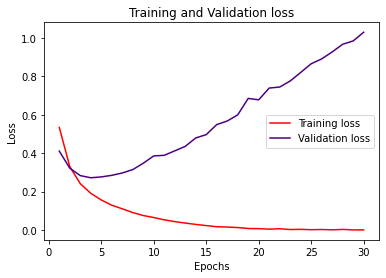

In [81]:
plt.plot(epochs,loss,'red',label='Training loss')
plt.plot(epochs,val_loss,'indigo',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='center right')
plt.show()

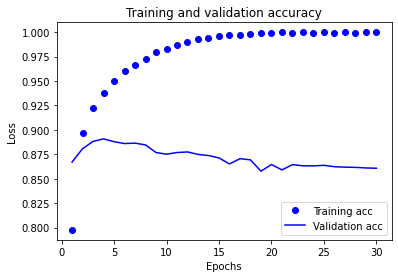

In [83]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [84]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4174 - accuracy: 0.8275
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2294 - accuracy: 0.9143
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1758 - accuracy: 0.9346
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3224 - accuracy: 0.8780


In [85]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
49/49 [==============================] - 1s 15ms/step - loss: 0.1317 - accuracy: 0.8290
Epoch 2/10
49/49 [==============================] - 1s 18ms/step - loss: 0.0658 - accuracy: 0.9157
Epoch 3/10
49/49 [==============================] - 1s 17ms/step - loss: 0.0503 - accuracy: 0.9360
Epoch 4/10
49/49 [==============================] - 1s 16ms/step - loss: 0.0426 - accuracy: 0.9462
Epoch 5/10
49/49 [==============================] - 1s 16ms/step - loss: 0.0375 - accuracy: 0.9544
Epoch 6/10
49/49 [==============================] - 1s 15ms/step - loss: 0.0317 - accuracy: 0.9626
Epoch 7/10
49/49 [==============================] - 1s 15ms/step - loss: 0.0290 - accuracy: 0.9665
Epoch 8/10
49/49 [==============================] - 1s 17ms/step - loss: 0.0264 - accuracy: 0.9692
Epoch 9/10
49/49 [==============================] - 1s 16ms/step - loss: 0.0241 - accuracy: 0.9720
Epoch 10/10
782/782 [==============================] - 3s 3ms/step - loss: 0.1171 - accuracy: 0.8643


In [86]:
model.predict(x_test)

array([[0.00968242],
       [0.9981704 ],
       [0.9583839 ],
       ...,
       [0.13141853],
       [0.00354376],
       [0.7121098 ]], dtype=float32)